In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as anim
from tqdm import tqdm 

# Punto 5

In [2]:
def System(r,t,q):
    x = r
    dxdt = x**q
    
    return dxdt

In [3]:
def solution(t, q): 
    return (t*(1-q)+1)**(1/(1-q))


def solution_q1(t, q): 
    return (np.e)**(t)


In [4]:
def Integrator2(f,r0,t,q):
    
    h = t[1] - t[0]
    print(h)
    
    x = np.zeros_like(t)
    
    x[0] = r0[0]

    
    K1 = np.zeros(1)
    K2 = np.zeros(1)
    
    # Las pendientes instantaneas
    R = np.zeros(1)

    for i in range(1,len(t)):
        
        R = np.array([x[i-1]])
        
        K1 = f(R,t[i-1],q)
        
        R = np.array([x[i-1]+h*K1[0]])
        
        K2 = f(R,t[i-1]+h,q)
        
        x[i] = x[i-1] + 0.5*h*(K1[0]+K2[0])

        
    return x

In [5]:
r0 = [1.]
h = 0.01
t = np.arange(0,10+h,h)


0.01


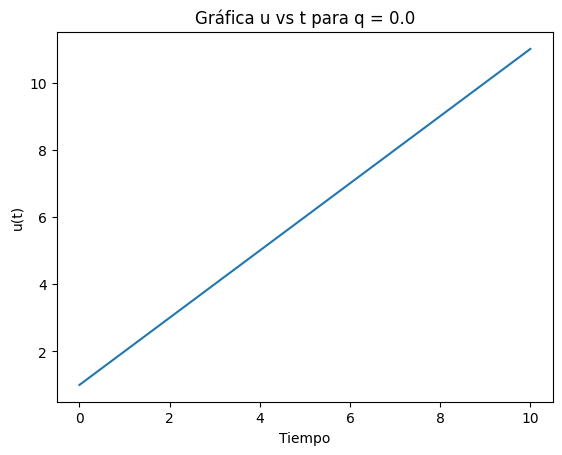

0.01


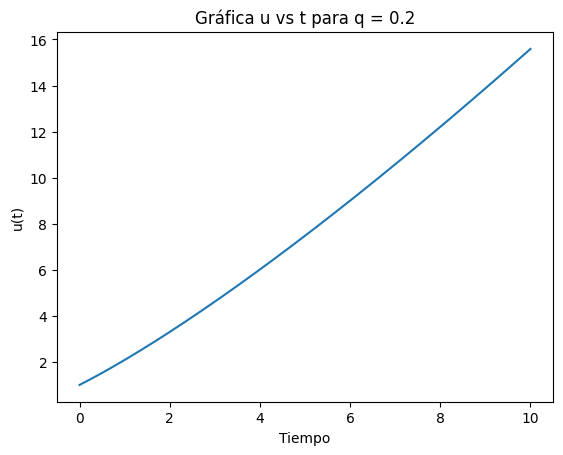

0.01


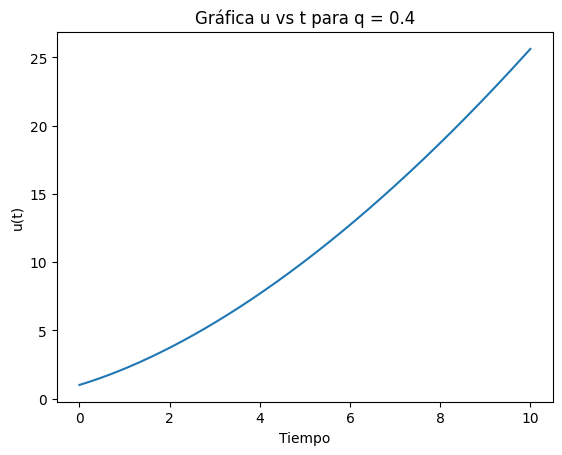

0.01


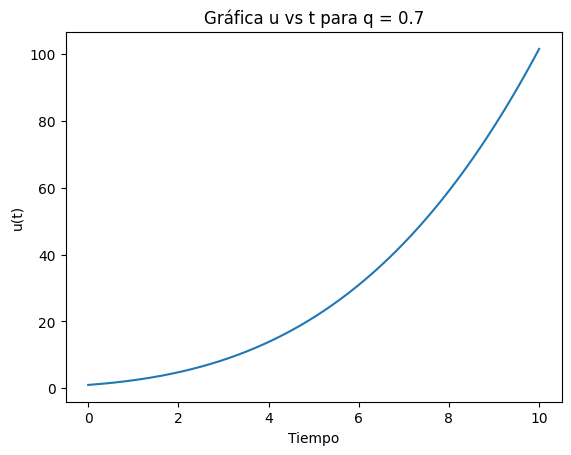

0.01


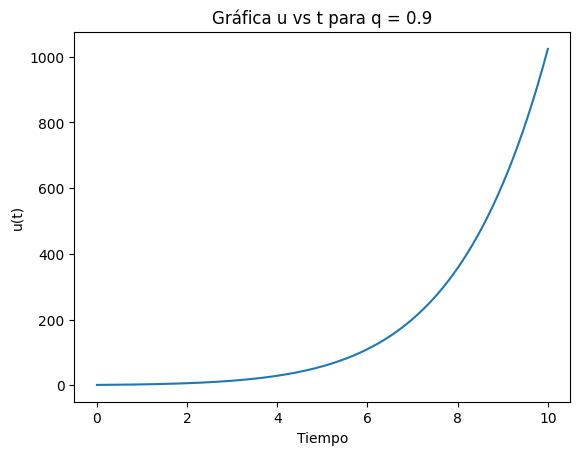

0.01


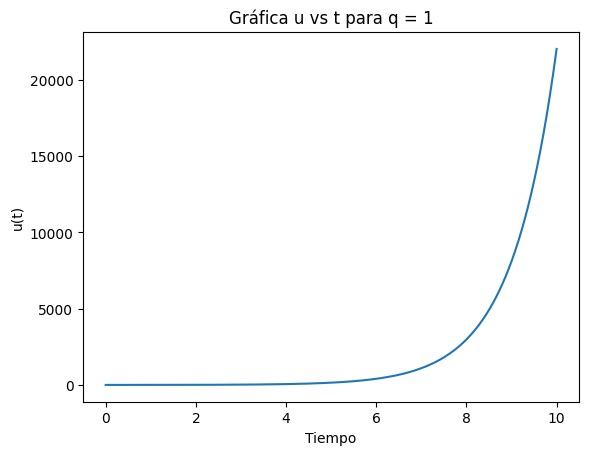

In [6]:
def plot(t,q): 
    x = Integrator2(System,r0,t,q)
    #El codigo comentado permite plotear la solución analitica
    """if q ==1: 
        real = solution_q1(t,q)
    else: 
        real = solution(t,q)
    plt.plot(t,real)"""
    plt.plot(t,x)
    plt.title("Gráfica u vs t para q = {}".format(q))
    plt.xlabel("Tiempo")
    plt.ylabel("u(t)")
   
    plt.show()

plot(t,0.)
plot(t,0.2)
plot(t,0.4)
plot(t,0.7)
plot(t,0.9)
plot(t,1)



# Punto 6

In [7]:
class Planeta:
    
    def __init__(self, e, a,alpha, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        self.alpha = alpha #Correccion
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1-self.e)/(self.a_*(1.+self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = ((-(self.G)/(d**3))*self.r)*(1+(self.alpha/d**2))
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt+(1/2)*self.a*self.dt**2
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = self.r + self.v*self.dt +(1/2)*self.a*self.dt**2

            self.vf = self.v +(1/2)*self.dt*(self.a+ self.a) # La aceleracion en este caso es independiente del tiempo! por eso es lo mismo 
            
    
            self.r = self.rf
            self.v = self.vf
    
    def SetPosition(self,i):
        #print(self.R[1000], "voy en el {}".format(i))
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        angle = []
        positionPerihelium=[]
        
        unitaryVector =np.zeros(3)
        unitaryVector[0]=-1
        
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                rUnitary = self.R[i]/np.linalg.norm(self.R[i])
                plt.scatter(self.R[i][0],self.R[i][0])
                timeup.append(self.t[i])
                positionPerihelium.append(self.R[i])
                angle.append(np.arccos(np.clip(np.dot(unitaryVector,rUnitary),-1.0,1.0)))
                                    
                        
            
        return timeup,positionPerihelium

In [ ]:
dt = 1*10**(-6)
tmax = 500
t = np.arange(0.,tmax,dt)

In [ ]:
Mercurio = Planeta(0.2056,0.307,1.1*10**(-8), t)

In [ ]:
def RunSimulation(t,Planeta):

    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):

        Planeta.Evolution(it)
            
            
    return Planeta

In [ ]:
Planeta = RunSimulation(t,Mercurio)

In [ ]:
scale = 1
t1 = t[::scale]

In [ ]:
t,position = Planeta.GetPerihelio()
print(len(t),len(position))
t = np.array(t)
position = np.array(position)
print(t)


In [ ]:
angles = []
i = 0 
for r in position:
    if i !=0: 
        rUnitary = r/np.linalg.norm(r)
        unitaryVector =np.zeros(3)
        unitaryVector[0]=-1
        angles.append(np.arccos(np.dot(unitaryVector,rUnitary)))
    i+=1
print(len(angles))
plt.scatter(t[1:],angles)
    
    
    

In [ ]:
Mx = Mercurio.GetPosition(scale)[:i,0]
My = Mercurio.GetPosition(scale)[:i,1]
plt.scatter(Mx,My)


In [ ]:
"""fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(221,projection='3d')
#ax = fig.add_subplot(222)
#ax2 = fig.add_subplot(223)

colors=['r','k','b']

def init():
    
    ax.clear()
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_zlim(-1,1)
    
    
def Update(i):
    
    init()
    # Mercurio  orbita
    Mx = Mercurio.GetPosition(scale)[:i,0]
    My = Mercurio[0].GetPosition(scale)[:i,1]
    ax.scatter(Mx,My,marker='.',label='Mercurio')

    
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)"""